In this sheet we will play with three most popular Stocastic Gradient descent variants in Neural Networks. **Momentum**, **RMSProp** and **Adam**.

In [75]:
#Do imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [36]:
from sklearn.datasets import load_iris

In [37]:
data = load_iris()

In [38]:
X,y = data['data'], data['target']

In [39]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
#Select sentosa and versicolor from X,y

In [44]:
X = X[(y==0) | (y==1)][:,[0,2]]
y = y[(y==0)|(y==1)]

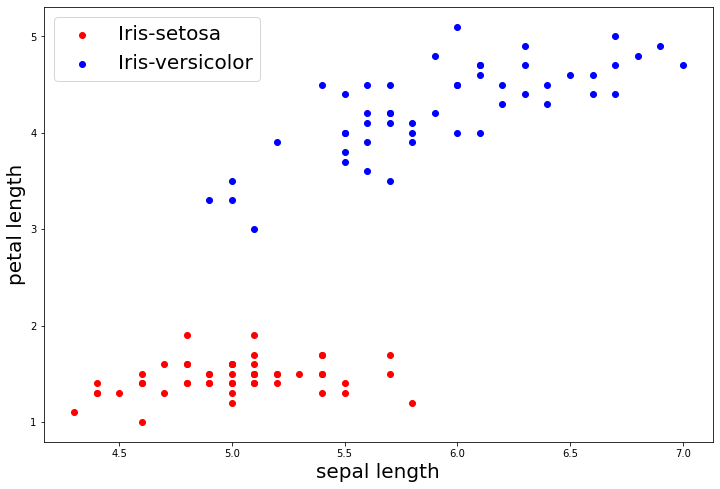

In [76]:
#Plot
plt.scatter(X[:50,0],X[:50,1], color='r', label='Iris-setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='b',label='Iris-versicolor')
plt.xlabel('sepal length', fontsize=20)
plt.ylabel('petal length', fontsize=20)
plt.legend(fontsize=20)

In [46]:
#Lets implement simple logistic regression to solve this problem
#Logistic function
def logistic(x, beta):
    return (1.0 / (1.0 + np.exp(-np.dot(x,beta))))

#Cost function
def cost(x, beta, y):
    yhat = logistic(x, beta)
    return -1 * (np.dot(y.T,np.log(yhat)) + np.dot((1- y).T,np.log(1-yhat)))

#Loss function
def loss(x, beta, y):
    return cost(x, beta, y)/x.shape[0]

#Gradient function
def gradient(x, beta, y):
    yhat = logistic(x, beta)
    return -1/y.shape[0] * np.matmul(x.T, (y-yhat))

#Predict function
def predict(x, beta):
    yhat = logistic(x, beta)
    return np.where(yhat > 0.5, 1, 0) 

In [47]:
#Utility function to plot decision boundary
def plotDecisionBoundary(X, beta=None,addOnes=False):
    #Plot the decision boundary
    plt.figure(figsize=(20,10))
    plt.scatter(X[:50,0],X[:50,1], color='r', label='Iris-setosa')
    plt.scatter(X[50:100,0],X[50:100,1], color='b',label='Iris-versicolor')
    plt.xlabel('sepal length', fontsize=20)
    plt.ylabel('petal length', fontsize=20)
    plt.legend(fontsize=20)

    xx1, xx2  = np.meshgrid(np.arange(X[:,0].min()-0.5,X[:,0].max()+0.5,0.01), np.arange(X[:,1].min()-0.5,X[:,1].max()+0.5,0.01))
    X_grid = np.array([xx1.ravel(), xx2.ravel()]).T
    if addOnes:
        X_grid_w_ones = np.hstack((np.ones(shape=(X_grid.shape[0],1)),X_grid))
        Y_grid = predict(X_grid_w_ones, beta)
    else:
        Y_grid = lr.predict(X_grid)
    Y_grid = Y_grid.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Y_grid, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

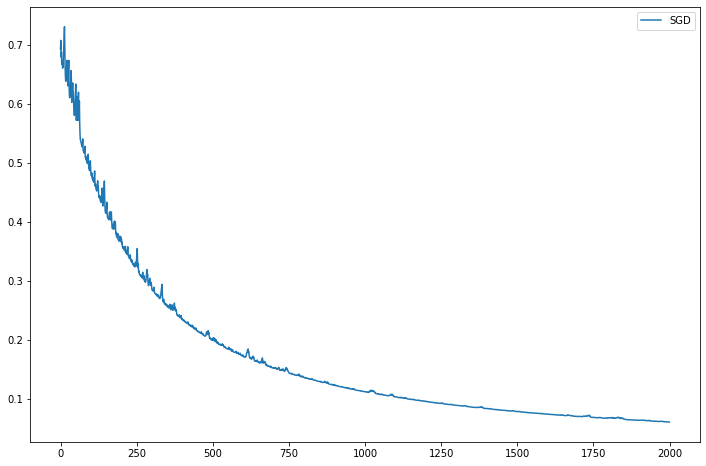

In [86]:
#Stochastic gradient descent
np.random.seed(0)
X_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
NEpoch = 20
#Initialize betas to zero
beta = np.zeros((X_w_ones.shape[1],1))
y_lr = y.reshape(y.shape[0],1)
learningRate = 0.01
losses_sgd = []
for i in range(NEpoch):
    p = np.random.permutation(X_w_ones.shape[0])
    X_w_ones = X_w_ones[p]
    y_lr = y_lr[p]
    for j in range(X_w_ones.shape[0]):
        #calculate loss
        losses_sgd.append(loss(X_w_ones, beta, y_lr)[0,0])
        beta = beta - learningRate * gradient(X_w_ones[j,:].reshape(1,3), beta, y_lr[j,:].reshape(1,1))
plt.plot(losses_sgd, label='SGD')
plt.legend()

### Momentum

**Momentum** update rule is like this:

$$ \begin{cases}
v_{dW} = \beta v_{dW} + (1 - \beta) dW \\
W = W - \alpha v_{dW}
\end{cases}$$

Basic Idea is we EMA the gradient before applying it to the parameter update step.

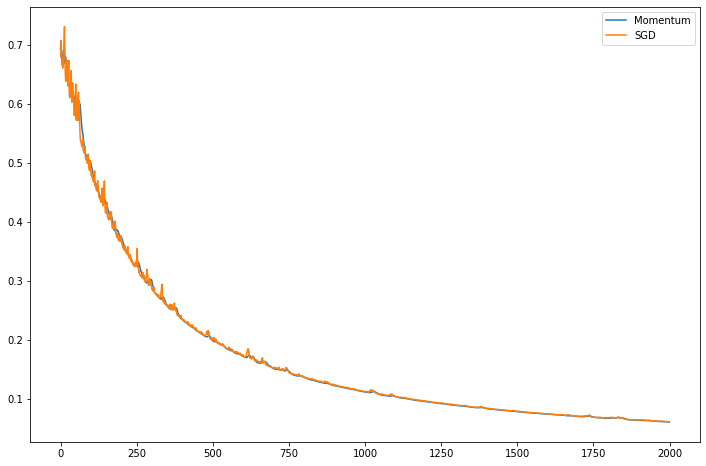

In [87]:
#Momentum
np.random.seed(0)
X_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
NEpoch = 20
#Initialize betas to zero
beta = np.zeros((X_w_ones.shape[1],1))
y_lr = y.reshape(y.shape[0],1)
learningRate = 0.01
losses_momentum = []
v = 0
momentumBeta = 0.9
for i in range(NEpoch):
    p = np.random.permutation(X_w_ones.shape[0])
    X_w_ones = X_w_ones[p]
    y_lr = y_lr[p]
    for j in range(X_w_ones.shape[0]):
        #calculate loss
        losses_momentum.append(loss(X_w_ones, beta, y_lr)[0,0])
        v = momentumBeta * v + (1-momentumBeta)*gradient(X_w_ones[j,:].reshape(1,3), beta, y_lr[j,:].reshape(1,1))
        beta = beta - learningRate * v
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_sgd, label='SGD')
plt.legend()

In this particular toy example there is hardly any difference between vanilla **SGD** and **SGD** with **Momentum**.

### RMSProp
**RMSProp** is a variant of **Stochastic Gradient Descent** which also sometimes help in faster conversion.

Equations for RMSProp are:

$$\begin{cases}
s_{dW} = \beta s_{dW} + (1 - \beta) dW^2 \\
W = W - \alpha \frac{dW}{\sqrt{s_{dW} + \varepsilon}}
\end{cases}$$

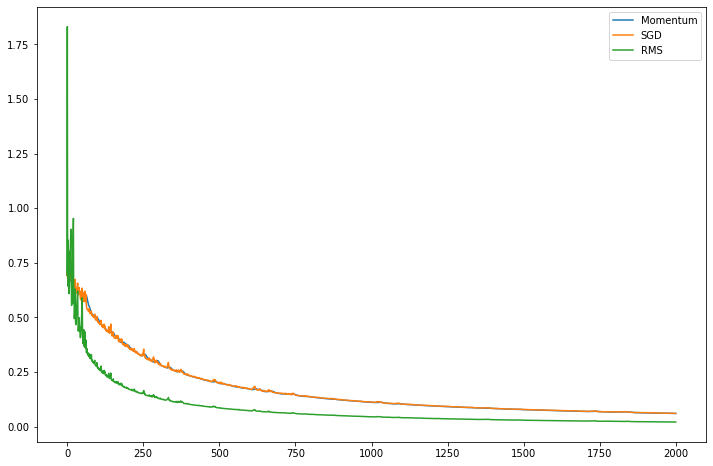

In [91]:
#RMSProp
np.random.seed(0)
X_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
NEpoch = 20
#Initialize betas to zero
beta = np.zeros((X_w_ones.shape[1],1))
y_lr = y.reshape(y.shape[0],1)
learningRate = 0.01
losses_rms = []
s = 0
rmsBeta = 0.999
epsilon = 1e-8
for i in range(NEpoch):
    p = np.random.permutation(X_w_ones.shape[0])
    X_w_ones = X_w_ones[p]
    y_lr = y_lr[p]
    for j in range(X_w_ones.shape[0]):
        #calculate loss
        losses_rms.append(loss(X_w_ones, beta, y_lr)[0,0])
        dw = gradient(X_w_ones[j,:].reshape(1,3), beta, y_lr[j,:].reshape(1,1))
        s = rmsBeta * s + (1-rmsBeta)*(dw**2)
        beta = beta - learningRate * dw/np.sqrt(s + epsilon)
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_rms, label='RMS')
plt.legend()

**RMSProp** seems to do better that **momentum** and **SGD**.

### Adam

Adam is one of the most widely used variant of **SGD**, **Adam** combines both **Momentum** and **RMSProp** ideas in one algorithm.

**Adam** update equations are:

$$\begin{cases}
v_{dW} = \beta_1 v_{dW} + (1 - \beta_1) dW \\
v^{corrected}_{dW} = \frac{v_{dW}}{1 - (\beta_1)^t} \\
s_{dW} = \beta_2 s_{dW} + (1 - \beta_2) dW^2 \\
s^{corrected}_{dW} = \frac{s_{dW}}{1 - (\beta_2)^t} \\
W = W - \alpha \frac{v^{corrected}_{dW}}{\sqrt{s^{corrected}_{dW} + \varepsilon}}
\end{cases}$$

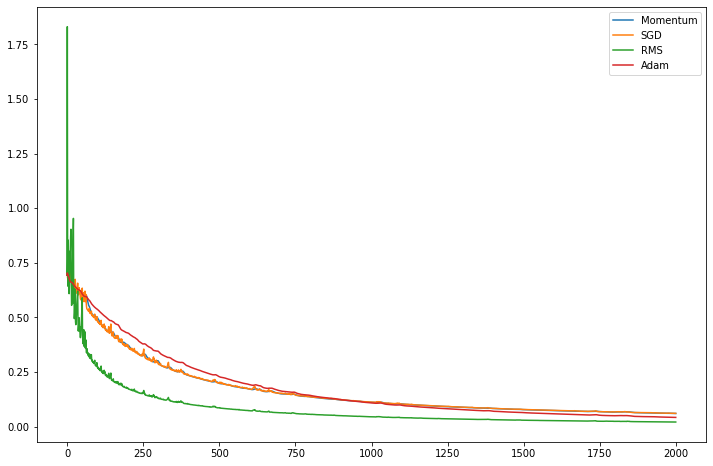

In [92]:
#Adam
np.random.seed(0)
X_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
NEpoch = 20
#Initialize betas to zero
beta = np.zeros((X_w_ones.shape[1],1))
y_lr = y.reshape(y.shape[0],1)
learningRate = 0.01
losses_adam = []
s = 0
v = 0
rmsBeta = 0.999
momentumBeta = 0.9
epsilon = 1e-8
t = 1
for i in range(NEpoch):
    p = np.random.permutation(X_w_ones.shape[0])
    X_w_ones = X_w_ones[p]
    y_lr = y_lr[p]
    for j in range(X_w_ones.shape[0]):
        #calculate loss
        losses_adam.append(loss(X_w_ones, beta, y_lr)[0,0])
        dw = gradient(X_w_ones[j,:].reshape(1,3), beta, y_lr[j,:].reshape(1,1))
        v = momentumBeta * v + (1-momentumBeta) * dw
        v_corrected = v / (1 - momentumBeta**t)
        s = rmsBeta * s + (1-rmsBeta)*(dw**2)
        s_corrected = s / (1-rmsBeta**t)
        beta = beta - learningRate * v_corrected/np.sqrt(s_corrected + epsilon)
        t += 1
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_rms, label='RMS')
plt.plot(losses_adam, label='Adam')
plt.legend()

We can see from the above plots that in this toy example **RMSProp** does the best.